INTEGRACIÓN NUMÉRICA

In [1]:
#Este ejercicio preparatorio busca que usted implemente correctamente tres métodos de integración numérica.
#Pruebe distintos valores de h. Si termina el ejercicio antes de que acabe la clase, repita el proceso para el método de Monte Carlo y el método del valor medio.

import numpy as np
import matplotlib.pylab as plt

# Función a integrar
def funcion(x1):
    	return np.cos(x1)


In [2]:
#El intervalo de integración es de 0 a 3pi/2.
#Divida el intervalo de integración en M secciones para calcular sus integrales.
#pruebe distintos valores de M

# paso 1: use linespace (ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
# para hacer el arreglo de su intervalo en x
M=9999
a=0
b=3*np.pi/2

x = np.linspace(a,b,M)
print(x)

#paso 2: genere el arreglo de valores de su función fx:

fx = np.cos(x)
print(fx)

[0.00000000e+00 4.71333165e-04 9.42666329e-04 ... 4.71144631e+00
 4.71191765e+00 4.71238898e+00]
[ 1.00000000e+00  9.99999889e-01  9.99999556e-01 ... -9.42666190e-04
 -4.71333147e-04 -1.83697020e-16]


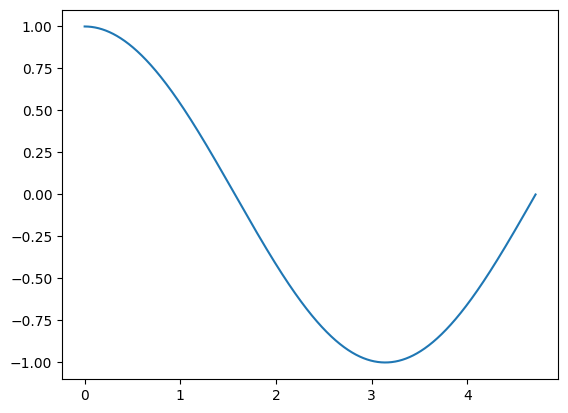

In [3]:
#1) grafique su función para verificar que hizo bien los pasos anteriores


import matplotlib.pyplot as plt

plt.plot(x,fx)

In [4]:
# 2a). Usando el método de suma de rectángulos, calcule la integral de la función.
#Compare su valor obtenido numéricamente con el valor analitico e imprima ambos valores.

h=(b-a)/(M-1)

rec = np.sum(fx)*h
real = np.sin(3*np.pi/2)-np.sin(0)

print(f"El valor por sumas de Riemann es: {rec}")
print(f"El valor analítico es: {real}")

print(f"Error relativo: {np.abs(rec-real)}")
print(f"Error absoluto porcentual: {np.abs(rec-real)/np.abs(real)*100}%")

El valor por sumas de Riemann es: -0.9997643149047516
El valor analítico es: -1.0
Error relativo: 0.00023568509524840575
Error absoluto porcentual: 0.023568509524840575%


In [5]:
# 2b). Usando el método de trapezoide, calcule la integral de la función.
#Compare su valor obtenido numéricamente con el valor analitico e imprima ambos valores.

trap = np.sum(fx[1:M-1])*h+fx[0]*h/2+fx[M-1]*h/2

print(f"El valor por método del trapecio es: {trap}")
print(f"El valor analítico es: {real}")

print(f"Error relativo: {np.abs(trap-real)}")
print(f"Error absoluto porcentual: {np.abs(trap-real)/np.abs(real)*100}%")

El valor por método del trapecio es: -0.9999999814870874
El valor analítico es: -1.0
Error relativo: 1.8512912647317137e-08
Error absoluto porcentual: 1.8512912647317137e-06%


In [6]:
# 2c). Usando el método de Simpson, calcule la integral de la función.
#Compare su valor obtenido numéricamente con el valor analitico e imprima ambos valores.

simpson = np.sum(fx[1:M-1:2]*4*h/3)+np.sum(fx[2:M-2:2]*2*h/3)+fx[0]*h/3+fx[M-1]*h/3 #fx[1:M-1:2]

print(f"El valor el método de Simpson 3/2 es: {simpson}")
print(f"El valor analítico es: {real}")

print(f"Error relativo: {np.abs(simpson-real)}")
print(f"Error absoluto porcentual: {np.abs(simpson-real)/np.abs(real)*100}%")

El valor el método de Simpson 3/2 es: -0.9999999999999999
El valor analítico es: -1.0
Error relativo: 1.1102230246251565e-16
Error absoluto porcentual: 1.1102230246251565e-14%


In [7]:
# 3a)Repita el ejercicio anterior usando algunos de los métodos de las librerías de scipy
# https://docs.scipy.org/doc/scipy/tutorial/integrate.html

import scipy.integrate as integrate

trapscipy = integrate.trapezoid(fx, x=x)

print("MÉTODO DEL TRAPECIO")
print("Valor real    Propio                    Scipy")
print(real,"        ",trap,"    ",trapscipy)

print(f"Error relativo: ")
print("Propio                       Scipy")
print(f"{np.abs(trap-real)}     {np.abs(trapscipy-real)}")

simpson_scipy = integrate.simpson(fx, x=x)

print("\nMÉTODO DE SIMPSON")
print("Valor real    Propio                    Scipy")
print(real,"        ",simpson,"    ",simpson_scipy)

print(f"Error relativo: ")
print("Propio                       Scipy")
print(f"{np.abs(simpson-real)}     {np.abs(simpson_scipy-real)}")

MÉTODO DEL TRAPECIO
Valor real    Propio                    Scipy
-1.0          -0.9999999814870874      -0.999999981487087
Error relativo: 
Propio                       Scipy
1.8512912647317137e-08     1.8512912980384044e-08

MÉTODO DE SIMPSON
Valor real    Propio                    Scipy
-1.0          -0.9999999999999999      -1.0
Error relativo: 
Propio                       Scipy
1.1102230246251565e-16     0.0


In [74]:
# 3b)OPCIONAL: Repita el ejercicio anterior usando el método de Monte Carlo y/o el del valor medio (ver diapositivas)

x_aleatorio = a+np.random.random(M)*(b-a)

In [81]:
#Método Monte Carlo

fx = funcion(x_aleatorio)

y_max = np.max(fx)
y_min = np.min(fx)

area_total=np.abs(y_max-y_min)*np.abs(b-a)

fx_aleatorio = y_min+np.random.random(M)*np.abs(y_max-y_min)

hits = fx_aleatorio <= fx
print(hits)
N_pond=np.sum(hits)
print(N_pond)
area_rectangulo_base=y_min*(b-a)
monte_carlo=area_total*(N_pond/M)+area_rectangulo_base
print(monte_carlo)
print(f"Error relativo: {np.abs(monte_carlo-real)}")
print(f"Error absoluto porcentual: {np.abs(monte_carlo-real)/np.abs(real)*100}%")

[False False  True ... False  True False]
3965
-0.9750907046819779
Error relativo: 0.024909295318022107
Error absoluto porcentual: 2.4909295318022107%


In [37]:
#Método del valor medio
fx_aleatorio = funcion(x_aleatorio)
valor_medio=(b-a)*1/M*np.sum(fx_aleatorio)
print(f"La integral por Método de Valor medio es: {valor_medio}")
print(f"Error relativo: {np.abs(valor_medio-real)}")
print(f"Error absoluto porcentual: {np.abs(valor_medio-real)/np.abs(real)*100}%")

La integral por Método de Valor medio es: -0.9668845363361587
Error relativo: 0.03311546366384133
Error absoluto porcentual: 3.3115463663841327%
